# Plot velocity and shape side by side

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from classes.Case import Case

In [2]:
from matplotlib import interactive

interactive(True)

In [3]:
font = {'family' : 'Times New Roman',
        'size'   : 11}

matplotlib.rc('font', **font)

## FVM data

In [4]:
import pandas as pd

miha_data_velocity = pd.read_csv('../data/miha_data.csv', delimiter=";", decimal=",")
miha_data_shape = pd.read_csv('../data/miha_tip_shape_t_6.csv', delimiter=",", decimal=".")

## Data

In [5]:
file = 'ball_0.0001_pu_8_wls_0.05_0.15.h5'
input_file = "../data/{}".format(file)
data = Case(input_file)

Loading data from ../data/ball_0.0001_pu_8_wls_0.05_0.15.h5 ...


In [6]:
time = 6
idx = data.times.index(time)
positions = data.positions[idx]

# Extract only dendrite boundary. Only one quearter please.
envelope_position_idx = list([i for i in range(len(data.types[idx])) if data.types[idx][i] == -2 and positions[0][i] >= 0 and positions[1][i] >= 0])
envelope_positions = positions[:, envelope_position_idx]

## Plot

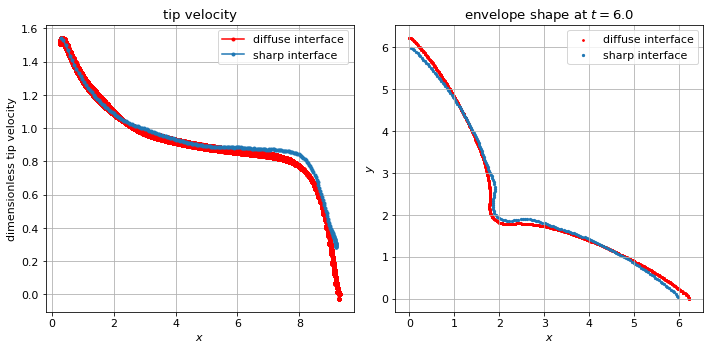

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Tip velocity.

axs[0].plot(miha_data_velocity['xTip'], miha_data_velocity['Vtip d1.0 Dx0.05'], 'r.-', label="diffuse interface")
axs[0].grid("both")
L = max(data.positions[0][0])
rel = [max(positions[0][types == -2]) for positions, types in zip(data.positions, data.types)]
axs[0].plot(rel[1:], data.velocities[1:], '.-', label = "sharp interface")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel("dimensionless tip velocity")
axs[0].grid("both")
axs[0].legend()
axs[0].set_title("tip velocity")

# Tip shape.
axs[1].scatter(miha_data_shape['Points_0'], miha_data_shape['Points_1'], s=3, c='r', label = "diffuse interface")
axs[1].scatter(envelope_positions[0], envelope_positions[1], s=5, label = "sharp interface")

# PLot metadata
axs[1].set_title("envelope shape at $t={:.1f}$".format(time))
axs[1].set_xlabel("$x$")
axs[1].set_ylabel("$y$")
axs[1].grid("both")
axs[1].legend()

plt.tight_layout()

if 1:
    plt.savefig('../results/dimensionless_tip_velocity_and_shape.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()